In [1478]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import optim
import torch.nn.functional as F
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as AUC
import matplotlib.pyplot as plt
%matplotlib inline

In [1403]:
data = pd.read_csv('/Users/yangzhou/R语言/数据/data.csv',index_col=0)

In [1404]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(data.iloc[:,[0,1,2,3,4,5]],data['label'],test_size=0.3,random_state=120)

In [1405]:
lr = LR(random_state=120).fit(Xtrain,Ytrain)

In [1406]:
lr.predict(Xtest)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,

In [1407]:
lr.score(Xtrain,Ytrain)

0.7316326530612245

In [1408]:
lr.score(Xtest,Ytest)

0.7309523809523809

In [1409]:
svc = SVC().fit(Xtrain,Ytrain)
svc.score(Xtrain,Ytrain)

0.7551020408163265

In [1410]:
svc.score(Xtest,Ytest)

0.7547619047619047

In [1411]:
data.iloc[:,[*range(6)]] = StandardScaler().fit_transform(data.iloc[:,[*range(6)]])

In [1412]:
data

,1,2,3,4,5,6,label
127,1.417109,1.338501,1.295564,1.150110,-0.509197,-0.364786,1
25,-0.280808,-0.364983,-0.418385,-0.482230,1.551746,1.393881,0
137,-1.347403,-1.346444,-1.353102,-1.368357,-0.632896,-0.697121,0
112,1.074244,1.003189,1.083707,1.077561,-0.876081,-0.846032,1
121,1.112244,0.979530,1.139172,1.090516,-0.839694,-0.800176,1
...,...,...,...,...,...,...,...
11,1.625246,1.509013,1.214640,1.060288,3.955993,5.421997,1
78,-0.145216,-0.230368,-0.225623,-0.293949,1.334012,1.276816,0
136,-1.224766,-1.250174,-1.243991,-1.262126,0.640191,0.268829,0
98,-0.893992,-0.944233,-0.921205,-0.918384,-0.854323,-0.852126,1


In [1413]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(data.iloc[:,[0,1,2,3,4,5]],data['label'],test_size=0.3,random_state=120)

In [1414]:
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

In [1415]:
lr = LR(random_state=120).fit(Xtrain,Ytrain)

In [1416]:
lr.predict(Xtest)

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,

In [1417]:
lr.score(Xtrain,Ytrain)

0.8744897959183674

In [1418]:
lr.score(Xtest,Ytest)

0.8523809523809524

In [1419]:
svc = SVC().fit(Xtrain,Ytrain)
svc.score(Xtrain,Ytrain)

0.8877551020408163

In [1420]:
svc.score(Xtest,Ytest)

0.8666666666666667

In [1421]:
# 单变量特征衍生
poly = PolynomialFeatures(degree=3).fit(Xtrain)
Xtrain_ = poly.transform(Xtrain)
Xtest_ = poly.transform(Xtest)

In [1422]:
Xtrain_.shape

(980, 84)

In [1423]:
Xtrain_ = torch.tensor(Xtrain_,dtype=torch.float32)
Ytrain_ = torch.tensor(np.array(Ytrain).reshape(-1,1),dtype=torch.float32)
dataset = TensorDataset(Xtrain_,Ytrain_)

In [1424]:
for i in dataset:
    print(i)
    break

(tensor([ 1.0000, -1.2161, -1.2233, -1.2331, -1.2621, -0.4925, -0.5834,  1.4790,
         1.4876,  1.4996,  1.5349,  0.5990,  0.7095,  1.4963,  1.5084,  1.5439,
         0.6025,  0.7137,  1.5205,  1.5563,  0.6073,  0.7194,  1.5930,  0.6216,
         0.7364,  0.2426,  0.2873,  0.3404, -1.7986, -1.8092, -1.8237, -1.8666,
        -0.7284, -0.8629, -1.8197, -1.8344, -1.8776, -0.7327, -0.8679, -1.8491,
        -1.8927, -0.7386, -0.8749, -1.9372, -0.7560, -0.8955, -0.2950, -0.3495,
        -0.4140, -1.8304, -1.8451, -1.8886, -0.7370, -0.8730, -1.8599, -1.9037,
        -0.7429, -0.8800, -1.9486, -0.7604, -0.9008, -0.2967, -0.3515, -0.4164,
        -1.8749, -1.9190, -0.7489, -0.8871, -1.9642, -0.7665, -0.9080, -0.2991,
        -0.3543, -0.4197, -2.0105, -0.7846, -0.9294, -0.3061, -0.3627, -0.4296,
        -0.1195, -0.1415, -0.1676, -0.1986]), tensor([0.]))


In [1425]:
data = DataLoader(dataset
          ,batch_size = 98
          ,shuffle = True # 划分小批量之前随机打乱数据
          ,drop_last = False # 是否舍弃最后一个batch
          )

In [1426]:
data

In [1427]:
for i in data:
    print(type(i[1][0]))
    break

<class 'torch.Tensor'>


In [1428]:
class Getfeature(nn.Module):
    def __init__(self,input_size,hidden_size,output_size,output):
        super(Getfeature,self).__init__()
        self.linear1 = nn.Linear(input_size,hidden_size)
        self.linear2 = nn.Linear(hidden_size,hidden_size)
        self.bn = nn.BatchNorm1d(hidden_size)
        self.linear3 = nn.Linear(hidden_size,output_size)
        self.output = nn.Linear(output_size,output)
    def forward(self,X):
        x = self.linear1(X)
        x = torch.tanh(self.linear2(x))
        x = self.bn(x)
        x = self.linear3(x)
        x = torch.sigmoid(self.output(x))
        return x

In [1429]:
gf = Getfeature(84,100,15,1)

In [1430]:
X = data.dataset[:2][0]

In [1431]:
X

tensor([[ 1.0000e+00, -1.2161e+00, -1.2233e+00, -1.2331e+00, -1.2621e+00,
         -4.9251e-01, -5.8343e-01,  1.4790e+00,  1.4876e+00,  1.4996e+00,
          1.5349e+00,  5.9896e-01,  7.0953e-01,  1.4963e+00,  1.5084e+00,
          1.5439e+00,  6.0246e-01,  7.1369e-01,  1.5205e+00,  1.5563e+00,
          6.0730e-01,  7.1942e-01,  1.5930e+00,  6.2161e-01,  7.3637e-01,
          2.4257e-01,  2.8735e-01,  3.4040e-01, -1.7986e+00, -1.8092e+00,
         -1.8237e+00, -1.8666e+00, -7.2841e-01, -8.6288e-01, -1.8197e+00,
         -1.8344e+00, -1.8776e+00, -7.3267e-01, -8.6794e-01, -1.8491e+00,
         -1.8927e+00, -7.3856e-01, -8.7491e-01, -1.9372e+00, -7.5596e-01,
         -8.9552e-01, -2.9499e-01, -3.4945e-01, -4.1397e-01, -1.8304e+00,
         -1.8451e+00, -1.8886e+00, -7.3697e-01, -8.7302e-01, -1.8599e+00,
         -1.9037e+00, -7.4289e-01, -8.8003e-01, -1.9486e+00, -7.6039e-01,
         -9.0076e-01, -2.9672e-01, -3.5150e-01, -4.1639e-01, -1.8749e+00,
         -1.9190e+00, -7.4886e-01, -8.

In [1432]:
gf.train()
gf.forward(X)

tensor([[0.5011],
        [0.4147]], grad_fn=<SigmoidBackward0>)

In [1433]:
# 定义训练函数
def fit(gf,data,lr=0.15,epochs=50,gamma=0):
    criterion = nn.BCEWithLogitsLoss()
    opt = optim.SGD(gf.parameters(),lr = lr,momentum=gamma)
    for epoch in range(epochs):
        correct = 0 
        samples = 0 
        losses = 0
        for batch_idx,(x,y) in enumerate(data):  
            sigma = gf.forward(x) 
            loss = criterion(sigma,y)
            loss.backward()
            opt.step()
            opt.zero_grad()

            yhat = torch.tensor([1 if i[0]>0.45 else 0 for i in sigma])
            losses += loss
            correct += torch.sum((yhat==y.reshape(-1)))
            samples += x.shape[0]
        
#     print(yhat,y,correct,samples,correct/samples,loss)
        print('Epoch{},Loss:{:.6f},Accurcay:{:.3f}'.format((epoch+1),losses,correct/samples))

In [1434]:
fit(gf,data)

Epoch1,Loss:6.598053,Accurcay:0.738
Epoch2,Loss:6.280297,Accurcay:0.729
Epoch3,Loss:6.147192,Accurcay:0.741
Epoch4,Loss:6.044327,Accurcay:0.749
Epoch5,Loss:5.970423,Accurcay:0.809
Epoch6,Loss:5.894012,Accurcay:0.848
Epoch7,Loss:5.815838,Accurcay:0.856
Epoch8,Loss:5.779888,Accurcay:0.865
Epoch9,Loss:5.738256,Accurcay:0.867
Epoch10,Loss:5.715981,Accurcay:0.862
Epoch11,Loss:5.667129,Accurcay:0.873
Epoch12,Loss:5.665441,Accurcay:0.868
Epoch13,Loss:5.630765,Accurcay:0.872
Epoch14,Loss:5.657976,Accurcay:0.865
Epoch15,Loss:5.641186,Accurcay:0.881
Epoch16,Loss:5.638784,Accurcay:0.869
Epoch17,Loss:5.633310,Accurcay:0.867
Epoch18,Loss:5.598786,Accurcay:0.886
Epoch19,Loss:5.608121,Accurcay:0.876
Epoch20,Loss:5.604112,Accurcay:0.890
Epoch21,Loss:5.580288,Accurcay:0.886
Epoch22,Loss:5.624419,Accurcay:0.884
Epoch23,Loss:5.584126,Accurcay:0.878
Epoch24,Loss:5.604734,Accurcay:0.878
Epoch25,Loss:5.582887,Accurcay:0.878
Epoch26,Loss:5.578236,Accurcay:0.885
Epoch27,Loss:5.555634,Accurcay:0.895
Epoch28,Lo

In [1435]:
gf.eval()
list(gf.modules())

[Getfeature(
   (linear1): Linear(in_features=84, out_features=100, bias=True)
   (linear2): Linear(in_features=100, out_features=100, bias=True)
   (bn): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (linear3): Linear(in_features=100, out_features=15, bias=True)
   (output): Linear(in_features=15, out_features=1, bias=True)
 ),
 Linear(in_features=84, out_features=100, bias=True),
 Linear(in_features=100, out_features=100, bias=True),
 BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=100, out_features=15, bias=True),
 Linear(in_features=15, out_features=1, bias=True)]

In [1436]:
dat = torch.tensor(Xtest_,dtype = torch.float32)

In [1437]:
# for i in list(gf.modules()):
#     print(list(i.parameters()))
#     break

# list(list(gf.modules())[1].parameters())[0].shape

# list(list(gf.modules())[1].parameters())[1].shape

# weight1 = list(list(gf.modules())[1].parameters())[0].T
# bias1 = list(list(gf.modules())[1].parameters())[1]

# torch.tensor(Xtest_).shape

# dat = torch.tensor(Xtest_,dtype = torch.float32)

# dat1 = torch.mm(dat,weight1)+bias1

# dat1.shape

# weight2 = list(list(gf.modules())[2].parameters())[0].T
# bias2 = list(list(gf.modules())[2].parameters())[1]

# dat2 = torch.mm(dat1,weight2)+bias2

# dat2.shape

# list(list(gf.modules())[3].parameters())[0].shape

In [1438]:
dat1 = list(gf.modules())[1](dat)

In [1439]:
dat2 = list(gf.modules())[2](dat1)

In [1440]:
dat3 = list(gf.modules())[3](dat2)

In [1441]:
dat4 = list(gf.modules())[4](dat3)

In [1442]:
dat4.shape

torch.Size([420, 15])

In [1468]:
pd.DataFrame(np.array(dat4.data)

array([[  0.33678725,   1.2147797 ,  -1.8703812 , ...,  -0.1339539 ,
          0.63768244,   2.3393173 ],
       [  1.709277  ,  10.241258  , -17.654549  , ...,  -5.387746  ,
          7.779695  ,  22.941868  ],
       [  0.28931928,   0.49153712,  -0.9538698 , ...,   0.3229857 ,
         -0.0859854 ,   1.3165612 ],
       ...,
       [ -0.45946926,  -2.4572227 ,   4.953645  , ...,   0.10296358,
         -1.4048275 ,  -5.490488  ],
       [  0.2566309 ,  -0.24687657,   0.6112071 , ...,  -0.10662124,
         -0.1264737 ,  -0.16592996],
       [ -0.5538189 ,   1.6360751 ,  -2.6526732 , ...,   0.38995802,
          0.0685605 ,   2.4589372 ]], dtype=float32)

In [1444]:
dats = Xtrain_

In [1445]:
dats1 = list(gf.modules())[1](dats)
dats2 = list(gf.modules())[2](dats1)
dats3 = list(gf.modules())[3](dats2)
dats4 = list(gf.modules())[4](dats3)

In [1446]:
dats4.data.shape

torch.Size([980, 15])

In [1447]:
datas_train = pd.concat([pd.DataFrame(np.array(dats4.data)),Ytrain],axis=1)

In [1448]:
datas_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,label
0,-0.749492,-1.630283,3.728924,0.707327,-2.523062,-0.710867,-1.049910,1.671355,-0.973223,2.373166,3.466010,-2.492012,0.179460,-1.182197,-4.548065,0
1,0.336100,0.429284,-0.855268,-0.483233,0.135230,0.714248,0.274540,-0.266729,0.809731,-1.593975,-0.861590,1.120774,-0.731529,0.691872,1.684818,1
2,-0.397218,2.075490,-3.666024,-0.252531,1.951885,-0.164355,1.212798,-2.299607,0.844968,-1.763271,-3.098124,3.061130,0.429305,0.270849,3.697443,1
3,0.483714,-6.588811,7.505974,-1.786843,-4.630233,-1.998383,-2.104033,4.063018,-2.267924,6.744471,6.615174,-5.589340,0.352250,-2.195503,-10.965594,0
4,0.350289,-1.150948,2.224948,0.432694,-0.756265,-0.399705,-0.456598,1.399052,-0.784067,1.139703,2.059972,-1.806142,0.141906,-0.937728,-2.197423,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,-1.116891,-4.060925,8.475224,1.331701,-5.324910,-1.190439,-2.344411,4.321236,-2.150110,5.078105,7.742535,-5.959800,0.127378,-2.223734,-9.913884,0
976,0.273700,-0.602456,1.313533,0.381458,-0.521507,0.204693,-0.308919,0.841713,-0.240764,0.133659,1.026918,-0.864384,-0.143895,-0.219856,-0.857039,0
977,0.247830,0.410682,-0.731119,0.054817,0.568186,0.064612,0.263497,-0.424404,0.076330,-0.406075,-0.648685,0.380968,0.300625,-0.172093,0.970995,1
978,-1.200336,-1.485246,3.945506,0.813248,-2.727261,-0.983967,-1.117261,1.434597,-1.067081,2.654791,3.775422,-2.372539,0.209811,-1.297749,-5.114480,0


In [1449]:
datas_test = pd.concat([pd.DataFrame(np.array(dat4.data)),Ytest],axis=1)

In [1493]:
datas_test.head(10).to_csv('/Users/yangzhou/Desktop/train.csv')

In [1451]:
lr1 = LR(solver='sag',max_iter=10000).fit(datas_train[[*range(15)]],datas_train['label'])

In [1452]:
lr1.score(datas_train[[*range(15)]],Ytrain)

0.8938775510204081

In [1453]:
lr1.score(datas_test[[*range(15)]],Ytest)

0.888095238095238

In [1454]:
svc1 = SVC().fit(datas_train[[*range(15)]],Ytrain)
svc1.score(datas_train[[*range(15)]],Ytrain)

0.9

In [1455]:
svc1.score(datas_test[[*range(15)]],Ytest)

0.8738095238095238

In [1456]:
estimators1 = [('logistic', LR(solver='sag',max_iter=10000))]

In [1457]:
clf1 = StackingClassifier(estimators=estimators1,final_estimator=SVC())

In [1458]:
clf1.fit(datas_train[[*range(15)]],Ytrain)

StackingClassifier(estimators=[('logistic',
                                LogisticRegression(max_iter=10000,
                                                   solver='sag'))],
                   final_estimator=SVC())

In [1459]:
clf1.score(datas_train[[*range(15)]],Ytrain)

0.8948979591836734

In [1460]:
clf1.score(datas_test[[*range(15)]],Ytest)

0.8904761904761904

In [1461]:
clf1.predict(datas_train[[*range(15)]])

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [1462]:
(clf1.predict(datas_train[[*range(15)]])==Ytrain).sum()

877

In [1463]:
estimators2 = [('SVC', SVC())]

In [1464]:
clf2 = StackingClassifier(estimators=estimators2,final_estimator= LR(solver='saga'))
clf2.fit(datas_train[[*range(15)]],Ytrain)

StackingClassifier(estimators=[('SVC', SVC())],
                   final_estimator=LogisticRegression(solver='saga'))

In [1465]:
clf2.score(datas_train[[*range(15)]],Ytrain)

0.8989795918367347

In [1466]:
clf2.score(datas_test[[*range(15)]],Ytest)

0.8904761904761904

In [1467]:
(clf2.predict(datas_train[[*range(15)]])==Ytrain).sum()

881

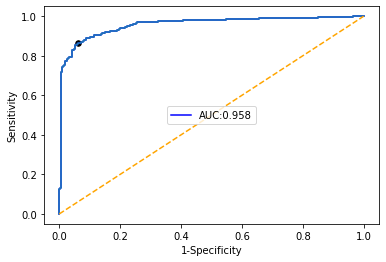

In [1492]:
fpr,tpr, thresholds = roc_curve(Ytrain,clf2.decision_function(datas_train[[*range(15)]]))
area = AUC(Ytrain,clf2.decision_function(datas_train[[*range(15)]]))
maxindex = (tpr-fpr).tolist().index(max(tpr-fpr))
plt.plot(fpr, tpr, color='blue',label='AUC:%0.3f' % area)
plt.scatter(fpr[maxindex],tpr[maxindex],c='black',s=30)
# plt.annotate((fpr[maxindex],tpr[maxindex]),(fpr[maxindex],tpr[maxindex]),(fpr[maxindex],tpr[maxindex]))
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc="center")